# Deephyper analytics - hyperparameter search study
**path to data file**: /home/rmlans/Desktop/ROMS/Closure_LSTM_NODE/HPS_Runs/lstm_burgulence/results.csv

for customization please see: https://matplotlib.org/api/matplotlib_configuration_api.html

## Setup & Data loading

In [1]:
path_to_data_file = '/home/rmlans/Desktop/ROMS/Closure_LSTM_NODE/HPS_Runs/lstm_burgulence/results.csv'

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from datetime import datetime
from tqdm import tqdm
from IPython.display import display, Markdown

width = 21
height = 13

matplotlib.rcParams.update({
    'font.size': 21,
    'figure.figsize': (width, height), 
    'figure.facecolor': 'white', 
    'savefig.dpi': 72, 
    'figure.subplot.bottom': 0.125, 
    'figure.edgecolor': 'white',
    'xtick.labelsize': 21,
    'ytick.labelsize': 21})

df = pd.read_csv(path_to_data_file)

display(Markdown(f'The search did _{df.count()[0]}_ **evaluations**.'))

df.head()

The search did _2151_ **evaluations**.

,Batch size,Momentum,decay,Learning rate,Epochs,Neurons,Sequence size,Loss,elapsed_sec
0,8,0.998848,0.000006,0.000544,317,73,30,-0.000096,5334.879663
1,5,0.992618,0.000007,0.000647,916,16,28,-0.000097,20859.565578
2,5,0.993178,0.000006,0.000277,867,70,30,-0.000102,16042.351587
3,5,0.991114,0.000010,0.000673,927,83,23,-0.000108,20859.573539
4,9,0.998836,0.000004,0.000365,264,65,19,-0.000132,4490.517621


## Statistical summary

In [3]:
df.describe()

,Batch size,Momentum,decay,Learning rate,Epochs,Neurons,Sequence size,Loss,elapsed_sec
count,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.00000,2151.000000,2151.000000,2151.000000
mean,10.335658,0.995245,0.000006,0.041023,638.519758,45.76755,21.775453,-0.255247,9007.069242
std,7.112114,0.003117,0.000003,0.028868,334.788074,27.07629,6.930034,0.546873,6864.524865
min,5.000000,0.990002,0.000001,0.000117,100.000000,5.00000,5.000000,-9.872666,127.716889
25%,5.000000,0.992045,0.000003,0.016945,274.500000,20.00000,18.000000,-0.290199,3009.204673
50%,6.000000,0.995925,0.000006,0.031772,820.000000,44.00000,23.000000,-0.070443,7862.227990
75%,14.000000,0.998373,0.000008,0.065063,914.000000,68.00000,27.000000,-0.013036,15424.080688
max,30.000000,0.998999,0.000010,0.099922,1000.000000,100.00000,30.000000,-0.000096,21394.246253


## Search trajectory

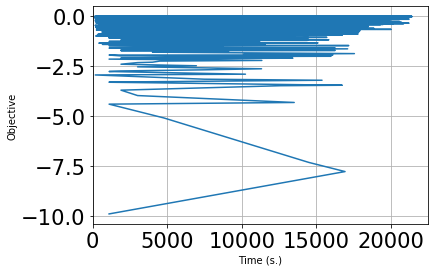

In [4]:
plt.plot(df.elapsed_sec, df.Loss)
plt.ylabel('Objective')
plt.xlabel('Time (s.)')
plt.xlim(0)
plt.grid()
plt.show()

## Pairplots

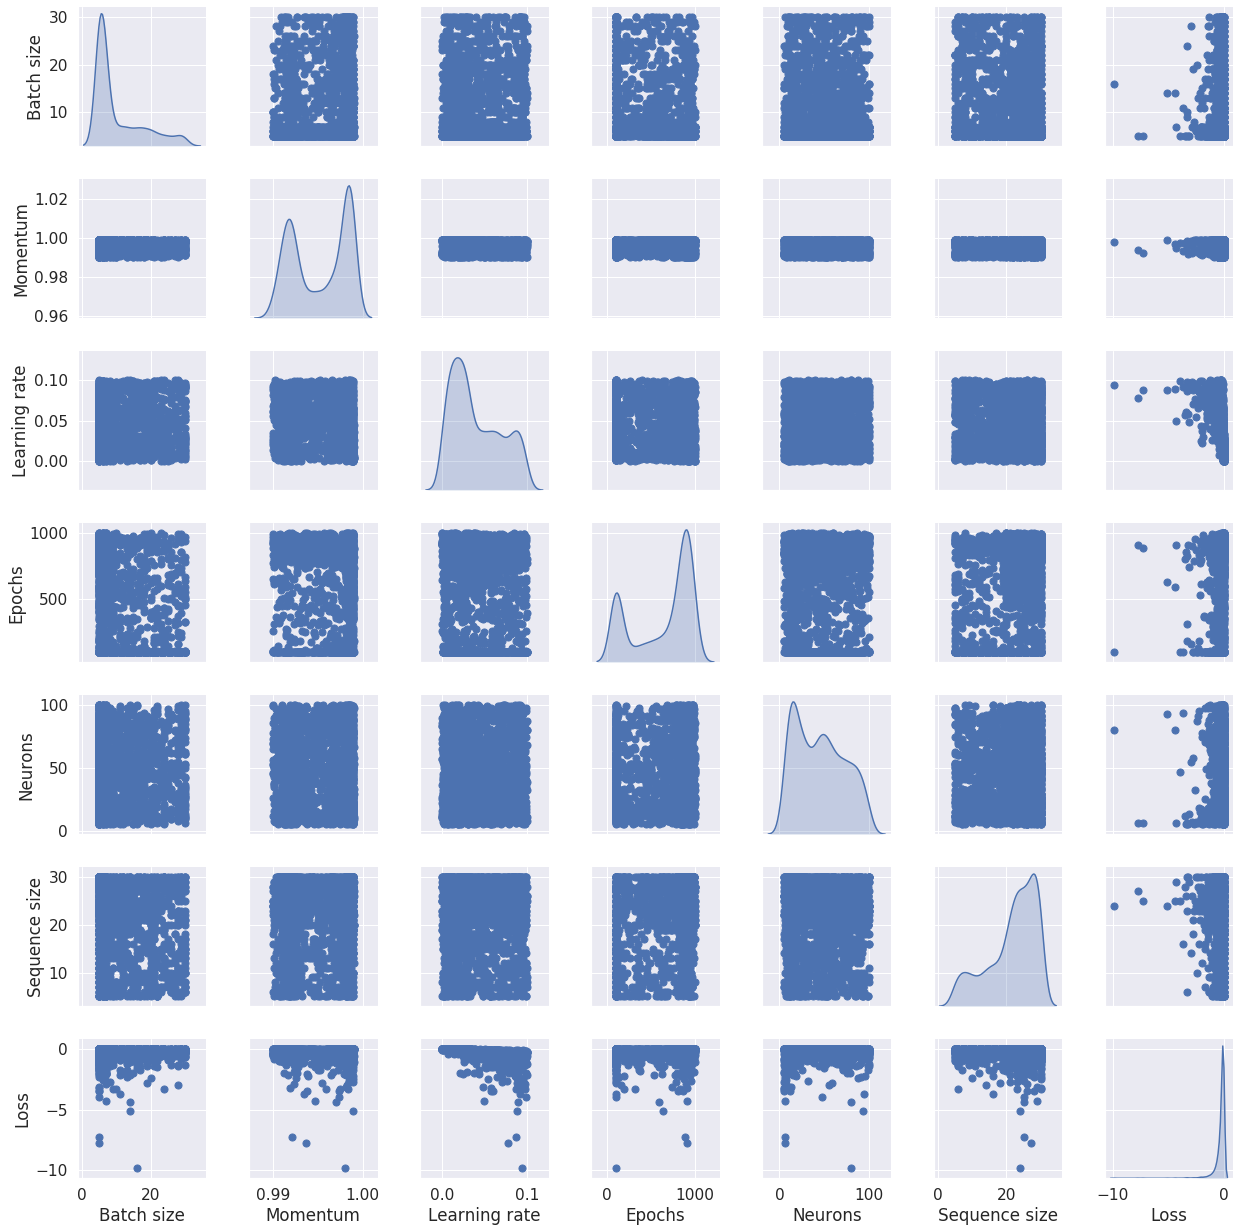

In [5]:
not_include = ['elapsed_sec','decay']
sns.set(font_scale=1.4)
sns.pairplot(df.loc[:, filter(lambda n: n not in not_include, df.columns)],
                diag_kind="kde", markers="o",
                plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                diag_kws=dict(shade=True))
plt.savefig('Figure_18.png')
plt.show()

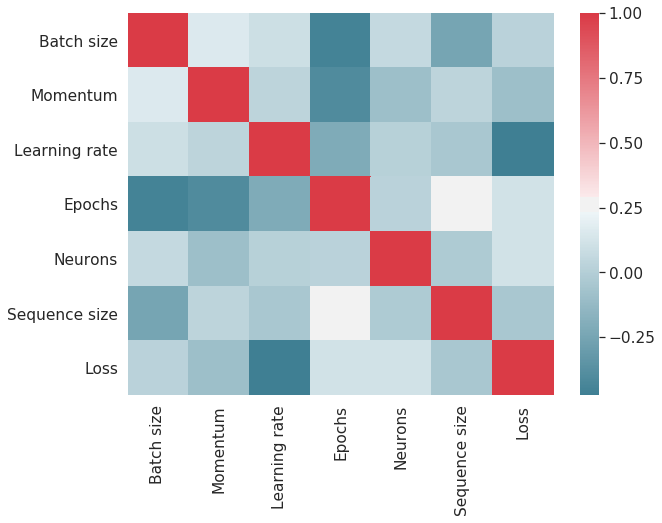

In [6]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)
corr = df.loc[:, filter(lambda n: n not in not_include, df.columns)].corr()
g = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.tight_layout(pad=2)
plt.savefig('Figure_19.png')
plt.show()

## Best objective

In [7]:
i_max = df.Loss.idxmax()
df.iloc[i_max]

Batch size          8.000000
Momentum            0.998848
decay               0.000006
Learning rate       0.000544
Epochs            317.000000
Neurons            73.000000
Sequence size      30.000000
Loss               -0.000096
elapsed_sec      5334.879663
Name: 0, dtype: float64

In [8]:
dict(df.iloc[i_max])

{'Batch size': 8.0,
 'Momentum': 0.998848446841937,
 'decay': 6.1587540045897e-06,
 'Learning rate': 0.0005440360402,
 'Epochs': 317.0,
 'Neurons': 73.0,
 'Sequence size': 30.0,
 'Loss': -9.63779642798698e-05,
 'elapsed_sec': 5334.87966346741}

In [ ]:
data = np.loadtxt('results.csv',delimiter=',',skiprows=1)
data = data[data[:,-1].argsort()]

plt.figure()
plt.plot(data[:,-1],-data[:,-2])
plt.show()